In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os, glob, inspect, sys
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0,parentdir) 
import epri_mc_lib_3 as mc
from importlib import reload
reload(mc)


<module 'epri_mc_lib_3' from '/home/nick/Bureau/Programming/S2DS/Oct20_EPRI/Task3/NB/epri_mc_lib_3.py'>

In [2]:
data = pd.read_csv(os.path.join(os.path.dirname(os.getcwd()), '../Data/Merged_data/Survival_df.csv'),
                  index_col=0)
data

,Observed,F_Time,NDE_cycle,diff_two_peaks_ratio,amp_ratio,pos_ratio,energy_ratio,NLE_ratio_51_17,NLE_ratio_85_17,NLE_ratio_119_17,NLO_avg,Avg_RP,ACEE_30_Avg_58,ACEE_500_Avg_58,ACPD_Avg_58
ID,,,,,,,,,,,,,,,
41C,True,2154137.0,0,2.104871,1.185236,1.002988,1.559453,0.893268,1.107898,0.462483,5.576476,190.979294,-0.137640,-2.866030,4.804749
44C,True,1318034.0,0,2.280959,1.365329,0.998446,1.504218,0.888503,1.140535,0.477160,4.619563,187.204261,-0.596385,-2.788500,3.370729
45C,False,3245267.0,0,1.245687,0.809970,0.989351,1.282046,0.896534,1.137561,0.491483,3.458337,189.010633,-0.645710,-3.202220,4.186639
19C,True,464392.0,450000,0.763296,1.128928,1.002407,1.126849,0.978877,1.235508,0.530102,3.798736,171.925123,-1.065155,-1.570740,3.226957
32C,True,306142.0,450000,0.610771,1.137713,0.994283,0.844962,0.844824,1.091099,0.459167,4.296261,169.717689,-0.617190,-1.312415,2.907922
23C,False,2255225.0,600000,0.397580,0.919473,0.999861,0.846653,0.918699,1.114762,0.495867,5.621833,173.403495,-0.831110,-1.194540,3.061743
25C,False,1444844.0,600000,0.821445,1.178319,1.003158,1.141313,0.881052,1.083718,0.477500,3.061693,172.727399,-0.912065,-0.927155,3.284087
21C,True,200007.0,600000,0.705402,1.151889,0.984968,0.853808,0.929446,1.119635,0.493245,4.626314,174.003954,-0.884900,-1.578795,2.764862
27C,True,297627.0,750000,0.144147,0.777585,1.002966,0.394731,0.912962,1.112708,0.500035,5.020607,173.688949,-1.276355,-1.602150,2.746634


In [3]:
data_x = data.iloc[:, 2:]
data_y = data.iloc[:, 0:2]


In [7]:
scaled_df = mc.scale_general(data_x, MinMaxScaler())[0]
scaled_df

,NDE_cycle,diff_two_peaks_ratio,amp_ratio,pos_ratio,energy_ratio,NLE_ratio_51_17,NLE_ratio_85_17,NLE_ratio_119_17,NLO_avg,Avg_RP,ACEE_30_Avg_58,ACEE_500_Avg_58,ACPD_Avg_58
ID,,,,,,,,,,,,,
41C,0.000000,0.917593,0.746081,0.617935,1.000000,0.361383,0.356725,0.308942,0.523859,1.000000,1.000000,0.147772,1.000000
44C,0.000000,1.000000,1.000000,0.477711,0.952577,0.325834,0.521246,0.458945,0.324522,0.822448,0.597138,0.181850,0.409761
45C,0.000000,0.515506,0.216983,0.196920,0.761826,0.385745,0.506255,0.605323,0.082626,0.907408,0.553822,0.000000,0.745587
19C,0.500000,0.289753,0.666691,0.600024,0.628578,1.000000,1.000000,1.000000,0.153535,0.103823,0.185472,0.717114,0.350584
32C,0.500000,0.218374,0.679078,0.349186,0.386556,0.000000,0.272039,0.275051,0.257175,0.000000,0.578867,0.830660,0.219270
23C,0.666667,0.118603,0.371374,0.521407,0.388009,0.551092,0.391323,0.650125,0.533307,0.173355,0.391007,0.882471,0.282582
25C,0.666667,0.316966,0.736329,0.623196,0.640996,0.270250,0.234833,0.462413,0.000000,0.141556,0.319913,1.000000,0.374099
21C,0.666667,0.262660,0.699064,0.061617,0.394152,0.631258,0.415889,0.623331,0.325929,0.201596,0.343769,0.713573,0.160387
27C,0.833333,0.000000,0.171322,0.617270,0.000000,0.508295,0.380970,0.692719,0.408065,0.186781,0.000000,0.703307,0.152884


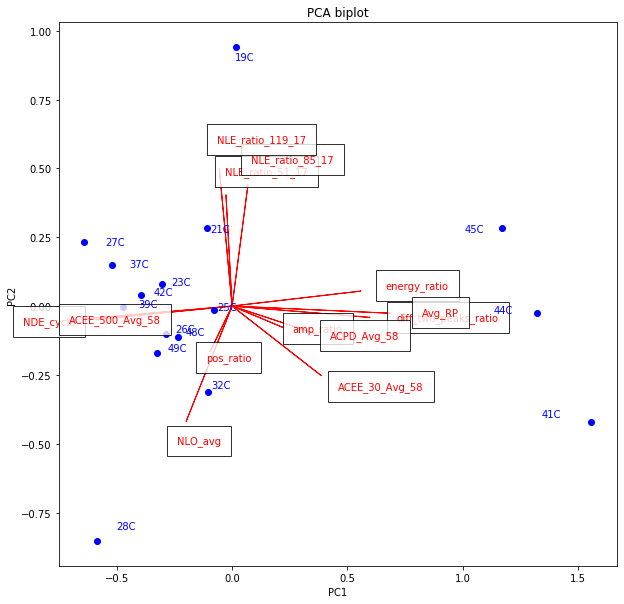

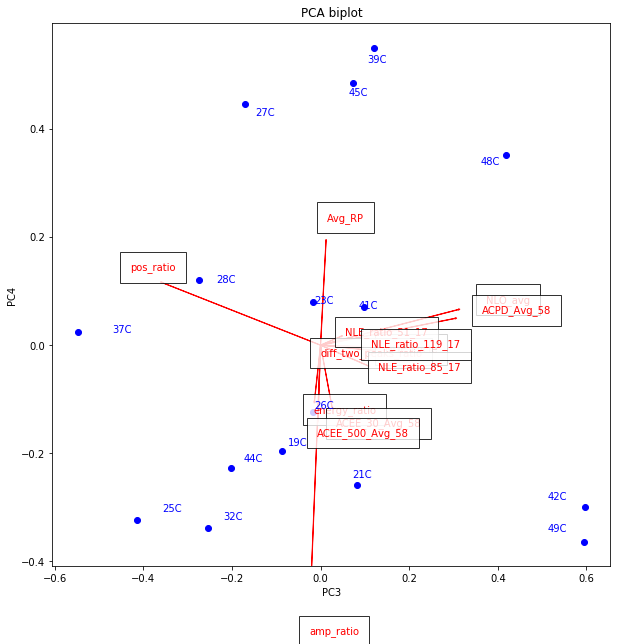

In [12]:
pca = PCA(n_components=4, svd_solver='full')
pca.fit(scaled_df)
mc.biplot(pca, scaled_df, 0, 1, "PCA biplot")    
mc.biplot(pca, scaled_df, 2, 3, "PCA biplot")    

Text(0, 0.5, 'Explained variance')

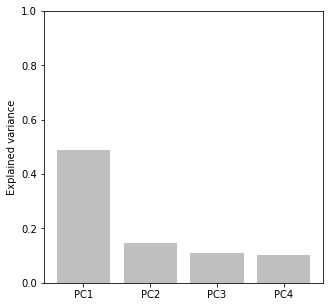

In [10]:
plt.figure(figsize=(5, 5))
plt.bar(["PC1","PC2","PC3","PC4"],pca.explained_variance_ratio_, align='center', alpha=0.5, color="gray")
plt.ylim(0,1)
plt.ylabel("Explained variance")

Text(0, 0.5, 'Explained variance')

<Figure size 432x432 with 0 Axes>

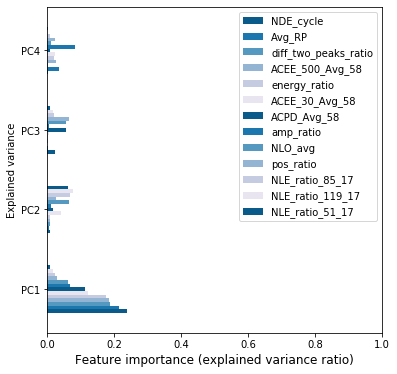

In [11]:
plt.figure(figsize=(6, 6))
feature_importance = pd.DataFrame([x*abs(y) for x,y in zip(pca.explained_variance_ratio_, pca.components_)],columns=scaled_df.columns, index=["PC1","PC2","PC3","PC4"] )
plot_feat_imp = feature_importance.transpose().sort_values('PC1', ascending=False).transpose()
plot_feat_imp.plot(kind='barh', color=sns.color_palette('PuBu_r', 6, desat=0.9), width=0.6, figsize=(6,6))
plt.xlabel('Feature importance (explained variance ratio)', fontsize = 12)
plt.xlim(0,1)
plt.ylabel("Explained variance")